In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from spafe.features.pncc import pncc

In [3]:
df = pd.read_csv('./coconut-maturity-dataset-wav-luar-kotak.csv')
df

,full_path,file_name,class_name
0,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10a.wav,mature
1,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10b.wav,mature
2,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10c.wav,mature
3,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11a.wav,mature
4,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11b.wav,mature
...,...,...,...
175,./Sample-kelapa/data/cut_sample/tua/wav/tua8b.wav,tua8b.wav,overmature
176,./Sample-kelapa/data/cut_sample/tua/wav/tua8c.wav,tua8c.wav,overmature
177,./Sample-kelapa/data/cut_sample/tua/wav/tua9a.wav,tua9a.wav,overmature
178,./Sample-kelapa/data/cut_sample/tua/wav/tua9b.wav,tua9b.wav,overmature


In [4]:
def createWaveplot(data, sampleRate, maturity, color):
    plt.figure(figsize=(8,2))
    plt.title(f'Waveplot for {maturity} maturity', size = 15, pad = 20)
    librosa.display.waveshow(data, sr=sampleRate, alpha=0.5, color=color)
    plt.show()

def amplitude_envelope(signal, frame_size: int = 2048, hop_length: int = 512):
    """Calculate the amplitude envelope of a signal with a given frame size nad hop length."""
    amplitude_envelope = []
    
    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length): 
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) 
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope)

In [5]:
pnccs = []
mfccs = []
pncc_vectors = []
mfcc_vectors = []
zcr = []
ae = []
rmse = []

for filename in df['full_path'].values:
    wavSig, sampRate = librosa.load(filename)
    pncc_result = pncc(wavSig, fs=sampRate)
    mfcc_result = librosa.feature.mfcc(y=wavSig, sr=sampRate)
    pnccs.append(pncc_result)
    mfccs.append(mfcc_result)
    pncc_vectors.append(pncc_result.shape)
    mfcc_vectors.append(mfcc_result.shape)
    ae_result = amplitude_envelope(wavSig)
    zcr_result = librosa.feature.zero_crossing_rate(wavSig)
    rmse_result = librosa.feature.rms(y=wavSig)
    ae.append(ae_result)
    zcr.append(zcr_result[0])
    rmse.append(rmse_result[0])

d:\Cool Yeah\Semester 118\coconut-maturity-classification\envSkripsi\lib\site-packages\spafe\features\pncc.py:169: RuntimeWarning: invalid value encountered in double_scalars
  [R_tilde[m, lprime] / Q_tilde[m, lprime] for lprime in range(l1, l2)]
d:\Cool Yeah\Semester 118\coconut-maturity-classification\envSkripsi\lib\site-packages\spafe\features\pncc.py:169: RuntimeWarning: divide by zero encountered in double_scalars
  [R_tilde[m, lprime] / Q_tilde[m, lprime] for lprime in range(l1, l2)]
d:\Cool Yeah\Semester 118\coconut-maturity-classification\envSkripsi\lib\site-packages\spafe\features\pncc.py:437: RuntimeWarning: invalid value encountered in multiply
  T = P * S_tilde


In [6]:
df['PNCC-feature'] = pnccs
df['PNCC-feature-size'] = pncc_vectors
df['MFCC-feature'] = mfccs
df['MFCC-feature-size'] = mfcc_vectors
df['amplitude-envelope'] = ae
df['zero-crossing-rate'] = zcr
df['RMS-energy'] = rmse
df

,full_path,file_name,class_name,PNCC-feature,PNCC-feature-size,MFCC-feature,MFCC-feature-size,amplitude-envelope,zero-crossing-rate,RMS-energy
0,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10a.wav,mature,"[[2.000098246886966, -0.32312278051968846, 0.0...","(98, 13)","[[-726.5902, -726.04486, -725.31476, -724.9084...","(20, 44)","[5.2741158e-05, 6.533848e-05, 6.533848e-05, 7....","[0.169921875, 0.2451171875, 0.322265625, 0.323...","[1.741442e-05, 2.2019052e-05, 2.6264723e-05, 2..."
1,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10b.wav,mature,"[[2.03020507353705, -0.3081231693218535, 0.023...","(98, 13)","[[-660.823, -660.6598, -660.7989, -660.306, -6...","(20, 44)","[8.562851e-05, 0.000106699576, 0.000106699576,...","[0.1552734375, 0.2197265625, 0.2861328125, 0.2...","[1.9825766e-05, 2.5567619e-05, 3.1338837e-05, ..."
2,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10c.wav,mature,"[[2.053201586789632, -0.30926271900245406, 0.0...","(98, 13)","[[-673.22833, -673.176, -673.22833, -672.8981,...","(20, 44)","[7.664046e-05, 7.664046e-05, 9.752976e-05, 9.7...","[0.1484375, 0.20947265625, 0.2802734375, 0.273...","[1.908695e-05, 2.4348914e-05, 2.868397e-05, 2...."
3,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11a.wav,mature,"[[2.1524977561943794, -0.2745882742675701, -0....","(98, 13)","[[-703.6863, -698.70905, -670.14465, -658.5095...","(20, 44)","[0.0004190257, 0.0004190257, 0.0004190257, 0.0...","[0.11865234375, 0.1572265625, 0.17919921875, 0...","[2.8227014e-05, 7.7885874e-05, 0.00011563334, ..."
4,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11b.wav,mature,"[[2.085433271523342, -0.3482630528427392, -0.0...","(98, 13)","[[-690.01776, -689.66144, -689.2191, -689.339,...","(20, 44)","[6.3666506e-05, 6.1336046e-05, 5.338081e-05, 5...","[0.15625, 0.23095703125, 0.30322265625, 0.3066...","[2.0658814e-05, 2.5298703e-05, 2.9047435e-05, ..."
...,...,...,...,...,...,...,...,...,...,...
175,./Sample-kelapa/data/cut_sample/tua/wav/tua8b.wav,tua8b.wav,overmature,"[[2.0537136283217605, -0.31411837379075197, 0....","(98, 13)","[[-714.5778, -713.85254, -713.69366, -705.8138...","(20, 44)","[0.00012795377, 0.0001551585, 0.00016831578, 0...","[0.16064453125, 0.23095703125, 0.27490234375, ...","[1.839841e-05, 2.621859e-05, 3.6141188e-05, 4...."
176,./Sample-kelapa/data/cut_sample/tua/wav/tua8c.wav,tua8c.wav,overmature,"[[1.9822215851057952, -0.31483581060334237, 0....","(98, 13)","[[-712.34656, -712.0022, -712.6092, -712.62354...","(20, 44)","[3.748658e-05, 3.748658e-05, 3.748658e-05, 3.9...","[0.1845703125, 0.26416015625, 0.3564453125, 0....","[1.7385477e-05, 2.1367476e-05, 2.4571253e-05, ..."
177,./Sample-kelapa/data/cut_sample/tua/wav/tua9a.wav,tua9a.wav,overmature,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","(98, 13)","[[-689.2629, -689.2629, -689.2629, -689.2629, ...","(20, 44)","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
178,./Sample-kelapa/data/cut_sample/tua/wav/tua9b.wav,tua9b.wav,overmature,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","(98, 13)","[[-677.02826, -677.02826, -677.02826, -677.028...","(20, 44)","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [167]:
df.to_csv('extracted-features.csv', index=False)

In [7]:
df_cut = df[df['PNCC-feature'].apply(lambda x: not np.isnan(x).any())]
df_cut.reset_index(drop=True, inplace=True)
df_cut

,full_path,file_name,class_name,PNCC-feature,PNCC-feature-size,MFCC-feature,MFCC-feature-size,amplitude-envelope,zero-crossing-rate,RMS-energy
0,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10a.wav,mature,"[[2.000098246886966, -0.32312278051968846, 0.0...","(98, 13)","[[-726.5902, -726.04486, -725.31476, -724.9084...","(20, 44)","[5.2741158e-05, 6.533848e-05, 6.533848e-05, 7....","[0.169921875, 0.2451171875, 0.322265625, 0.323...","[1.741442e-05, 2.2019052e-05, 2.6264723e-05, 2..."
1,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10b.wav,mature,"[[2.03020507353705, -0.3081231693218535, 0.023...","(98, 13)","[[-660.823, -660.6598, -660.7989, -660.306, -6...","(20, 44)","[8.562851e-05, 0.000106699576, 0.000106699576,...","[0.1552734375, 0.2197265625, 0.2861328125, 0.2...","[1.9825766e-05, 2.5567619e-05, 3.1338837e-05, ..."
2,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10c.wav,mature,"[[2.053201586789632, -0.30926271900245406, 0.0...","(98, 13)","[[-673.22833, -673.176, -673.22833, -672.8981,...","(20, 44)","[7.664046e-05, 7.664046e-05, 9.752976e-05, 9.7...","[0.1484375, 0.20947265625, 0.2802734375, 0.273...","[1.908695e-05, 2.4348914e-05, 2.868397e-05, 2...."
3,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11a.wav,mature,"[[2.1524977561943794, -0.2745882742675701, -0....","(98, 13)","[[-703.6863, -698.70905, -670.14465, -658.5095...","(20, 44)","[0.0004190257, 0.0004190257, 0.0004190257, 0.0...","[0.11865234375, 0.1572265625, 0.17919921875, 0...","[2.8227014e-05, 7.7885874e-05, 0.00011563334, ..."
4,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11b.wav,mature,"[[2.085433271523342, -0.3482630528427392, -0.0...","(98, 13)","[[-690.01776, -689.66144, -689.2191, -689.339,...","(20, 44)","[6.3666506e-05, 6.1336046e-05, 5.338081e-05, 5...","[0.15625, 0.23095703125, 0.30322265625, 0.3066...","[2.0658814e-05, 2.5298703e-05, 2.9047435e-05, ..."
...,...,...,...,...,...,...,...,...,...,...
134,./Sample-kelapa/data/cut_sample/tua/wav/tua2c.wav,tua2c.wav,overmature,"[[2.021531665614917, -0.32578074400792156, 0.0...","(98, 13)","[[-706.5763, -706.55695, -706.5829, -706.5764,...","(20, 44)","[4.4958317e-05, 4.4958317e-05, 5.7125806e-05, ...","[0.16796875, 0.2421875, 0.33203125, 0.33007812...","[1.7348988e-05, 2.1297352e-05, 2.4144223e-05, ..."
135,./Sample-kelapa/data/cut_sample/tua/wav/tua4a.wav,tua4a.wav,overmature,"[[2.1749682479502663, -0.36037524712967883, -0...","(98, 13)","[[-761.9785, -753.03973, -747.70654, -745.4355...","(20, 44)","[0.00015697465, 0.0001644985, 0.0001644985, 0....","[0.11376953125, 0.1689453125, 0.21630859375, 0...","[3.4832294e-05, 4.397031e-05, 5.5298387e-05, 5..."
136,./Sample-kelapa/data/cut_sample/tua/wav/tua8a.wav,tua8a.wav,overmature,"[[2.1839039600808268, -0.44852762948216335, 0....","(98, 13)","[[-723.2729, -720.58295, -724.2534, -725.74774...","(20, 44)","[0.00016171605, 0.00015997203, 8.671761e-05, 8...","[0.166015625, 0.24951171875, 0.33154296875, 0....","[3.8330938e-05, 4.2394706e-05, 4.485954e-05, 3..."
137,./Sample-kelapa/data/cut_sample/tua/wav/tua8b.wav,tua8b.wav,overmature,"[[2.0537136283217605, -0.31411837379075197, 0....","(98, 13)","[[-714.5778, -713.85254, -713.69366, -705.8138...","(20, 44)","[0.00012795377, 0.0001551585, 0.00016831578, 0...","[0.16064453125, 0.23095703125, 0.27490234375, ...","[1.839841e-05, 2.621859e-05, 3.6141188e-05, 4...."


In [8]:
df_cut.to_csv('extracted-features-cut.csv', index=False)

In [8]:
import numpy as np

# Assuming you have the individual feature arrays for each data point
feature1 = np.random.random((60, 98, 13))
feature2 = np.random.random((60, 20, 44))
feature3 = np.random.random((60, 44))
feature4 = np.random.random((60, 44))
feature5 = np.random.random((60, 44))

# Concatenate the features along the appropriate axis
X = np.concatenate((feature1.reshape(60, -1),
                    feature2.reshape(60, -1),
                    feature3.reshape(60, -1),
                    feature4.reshape(60, -1),
                    feature5.reshape(60, -1)), axis=1)

# Create the labels array
labels = np.repeat(['LabelA', 'LabelB', 'LabelC'], 60)

In [7]:
print(np.stack(df_cut['PNCC-feature'].values).shape)
print(np.stack(df_cut['MFCC-feature'].values).shape)
print(np.stack(df_cut['amplitude-envelope'].values).shape)
print(np.stack(df_cut['zero-crossing-rate'].values).shape)
print(np.stack(df_cut['RMS-energy'].values).shape)

(139, 98, 13)
(139, 20, 44)
(139, 44)
(139, 44)
(139, 44)


In [8]:
pncc_feature = np.stack(df_cut['PNCC-feature'].values)
mfcc_feature = np.stack(df_cut['MFCC-feature'].values)
ae_feature = np.stack(df_cut['amplitude-envelope'].values)
zcr_feature = np.stack(df_cut['zero-crossing-rate'].values)
rmse_feature = np.stack(df_cut['RMS-energy'].values)

X = np.concatenate((pncc_feature.reshape(139, -1),
                    mfcc_feature.reshape(139, -1),
                    ae_feature.reshape(139, -1),
                    zcr_feature.reshape(139, -1),
                    rmse_feature.reshape(139, -1)), axis=1)

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

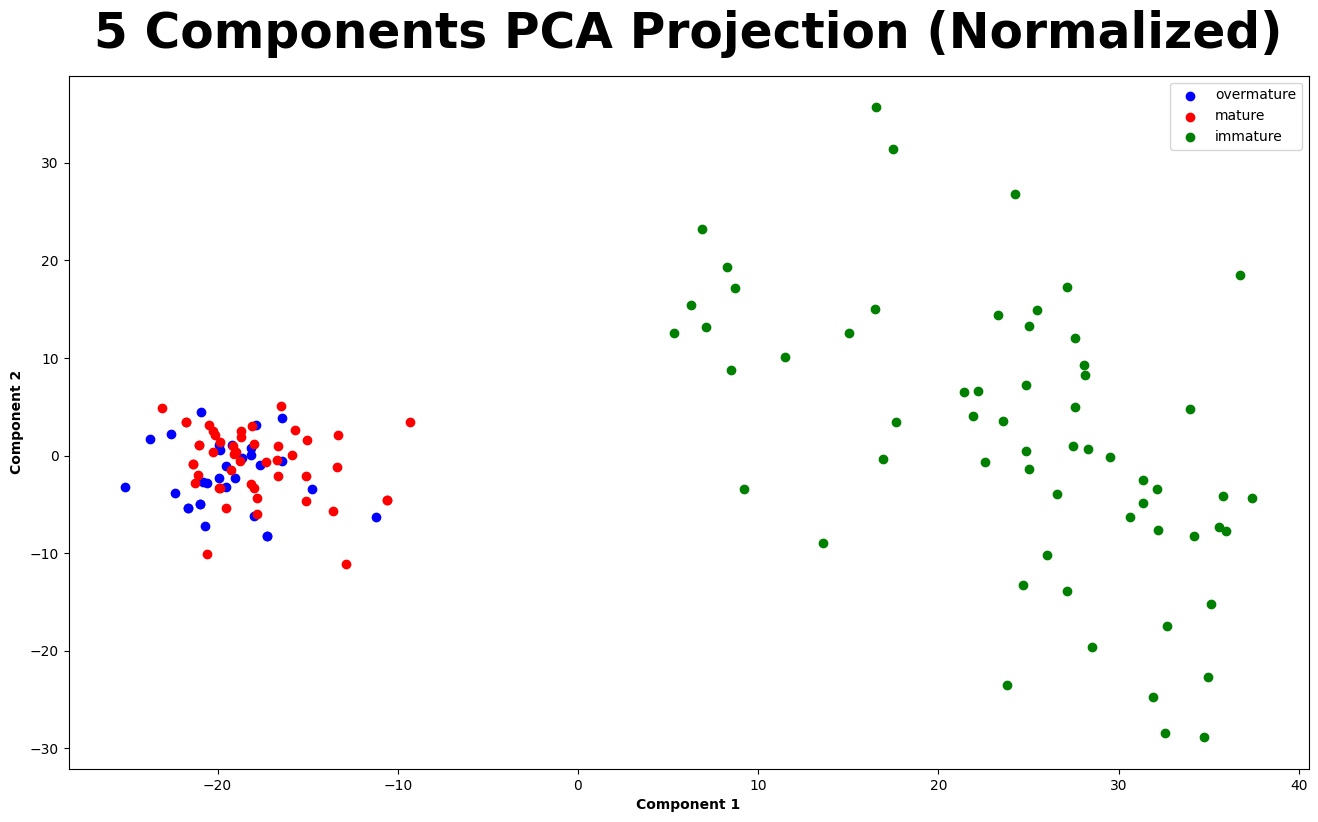

In [10]:
pca = PCA(n_components=5)
pca.fit(X_scaled)
pca_result = pca.transform(X_scaled)

labels = df_cut['class_name'].values.tolist()

# Create a dictionary to map labels to colors for plotting
label_colors = {'mature': 'red', 'immature': 'green', 'overmature': 'blue'}

x = pca_result[:, 0]
y = pca_result[:, 1]

unique_labels = set(labels)

fig, ax = plt.subplots(figsize=(16, 9))
for label in unique_labels:
    indices = np.where(np.array(labels) == label)
    ax.scatter(x[indices], y[indices], c=label_colors[label], label=label)

plt.title('5 Components PCA Projection (Normalized)', fontsize=35, pad=20, fontweight='bold')
plt.xlabel('Component 1', fontweight='bold')
plt.ylabel('Component 2', fontweight='bold')

# Add a legend
ax.legend()

# Show the plot
plt.show()

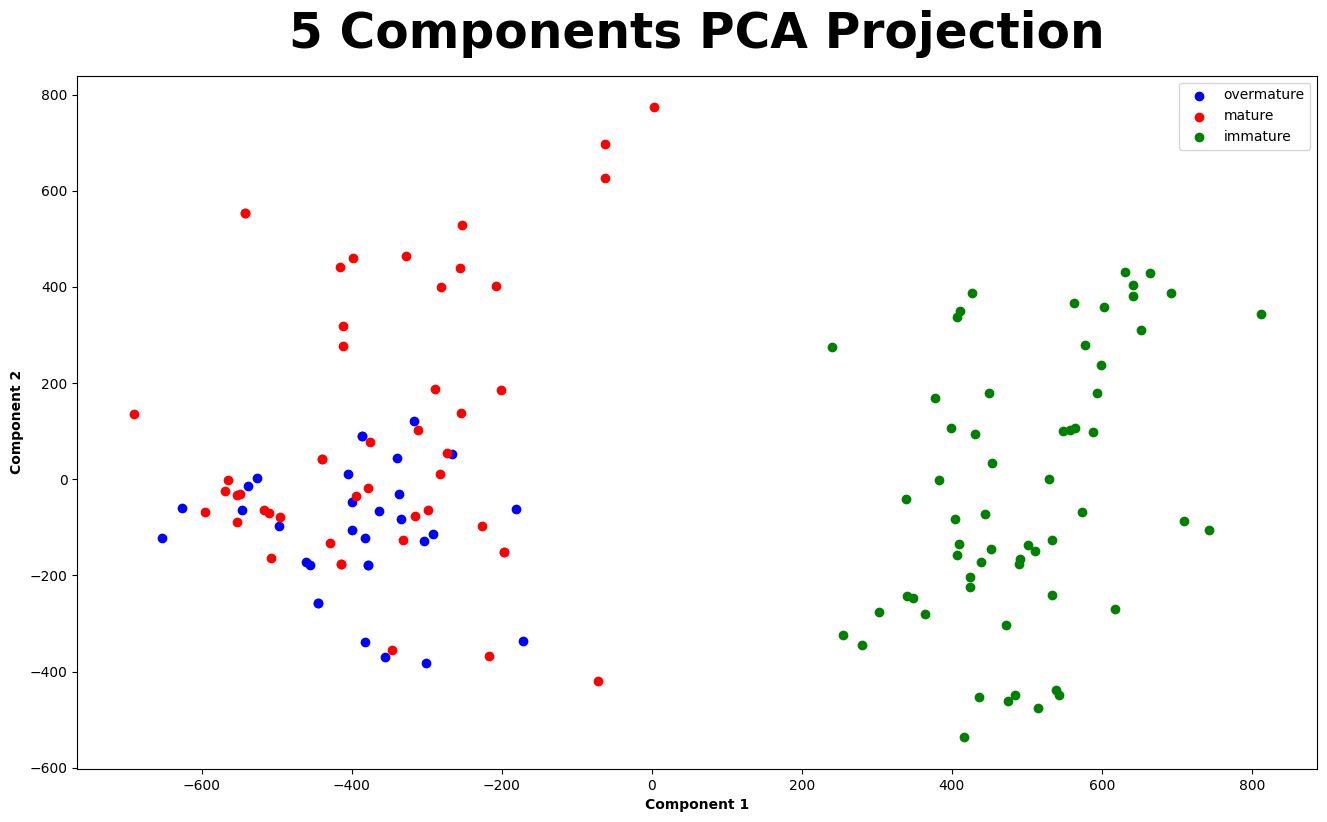

In [11]:
pca = PCA(n_components=5)
pca.fit(X)
pca_result = pca.transform(X)

labels = df_cut['class_name'].values.tolist()

# Create a dictionary to map labels to colors for plotting
label_colors = {'mature': 'red', 'immature': 'green', 'overmature': 'blue'}

x = pca_result[:, 0]
y = pca_result[:, 1]

unique_labels = set(labels)

fig, ax = plt.subplots(figsize=(16, 9))
for label in unique_labels:
    indices = np.where(np.array(labels) == label)
    ax.scatter(x[indices], y[indices], c=label_colors[label], label=label)

plt.title('5 Components PCA Projection', fontsize=35, pad=20, fontweight='bold')
plt.xlabel('Component 1', fontweight='bold')
plt.ylabel('Component 2', fontweight='bold')

# Add a legend
ax.legend()

# Show the plot
plt.show()

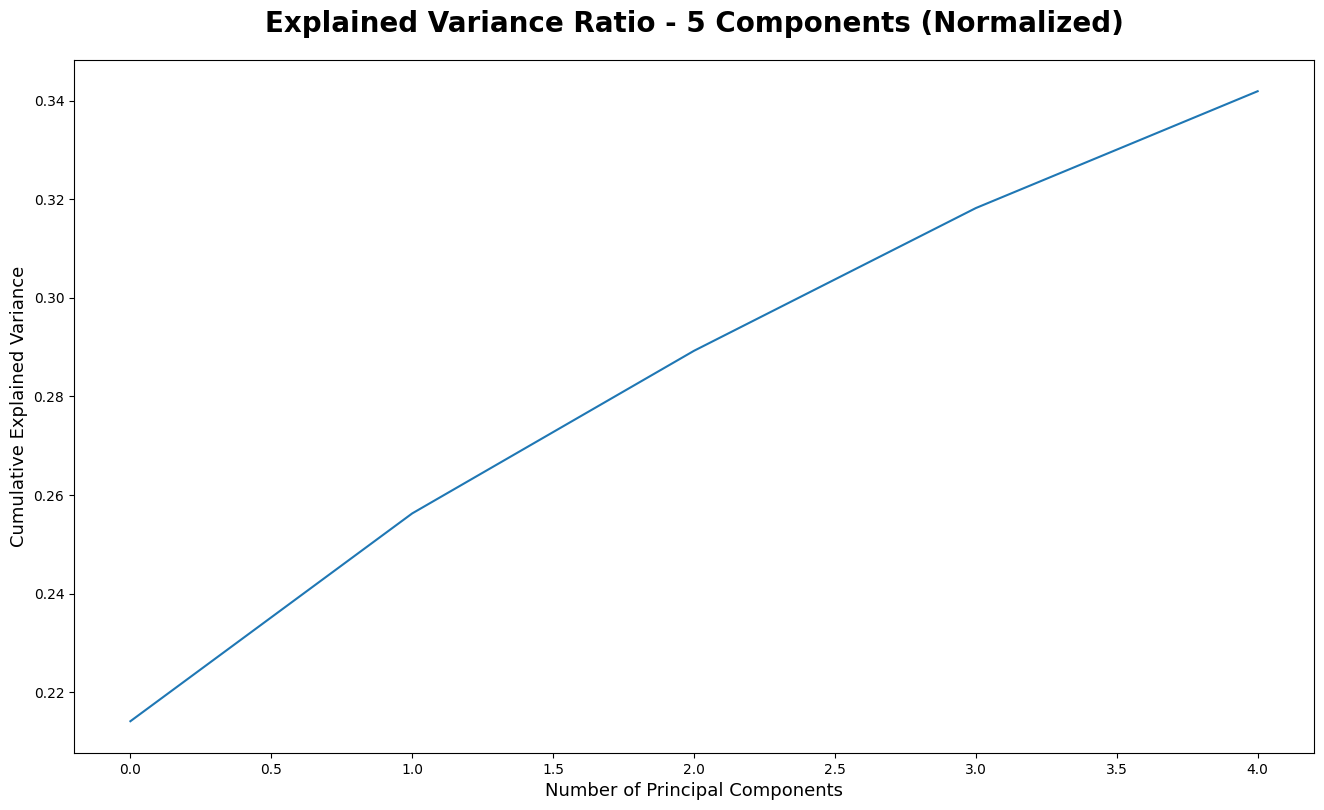

In [12]:
pca = PCA(n_components=5)
pca.fit(X_scaled)
pca_result = pca.transform(X_scaled)

plt.subplots(figsize = (16, 9))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components', fontsize=13)
plt.ylabel('Cumulative Explained Variance', fontsize=13)
plt.title('Explained Variance Ratio - 5 Components (Normalized)', fontsize=20, pad=20, fontweight='bold')
plt.show()

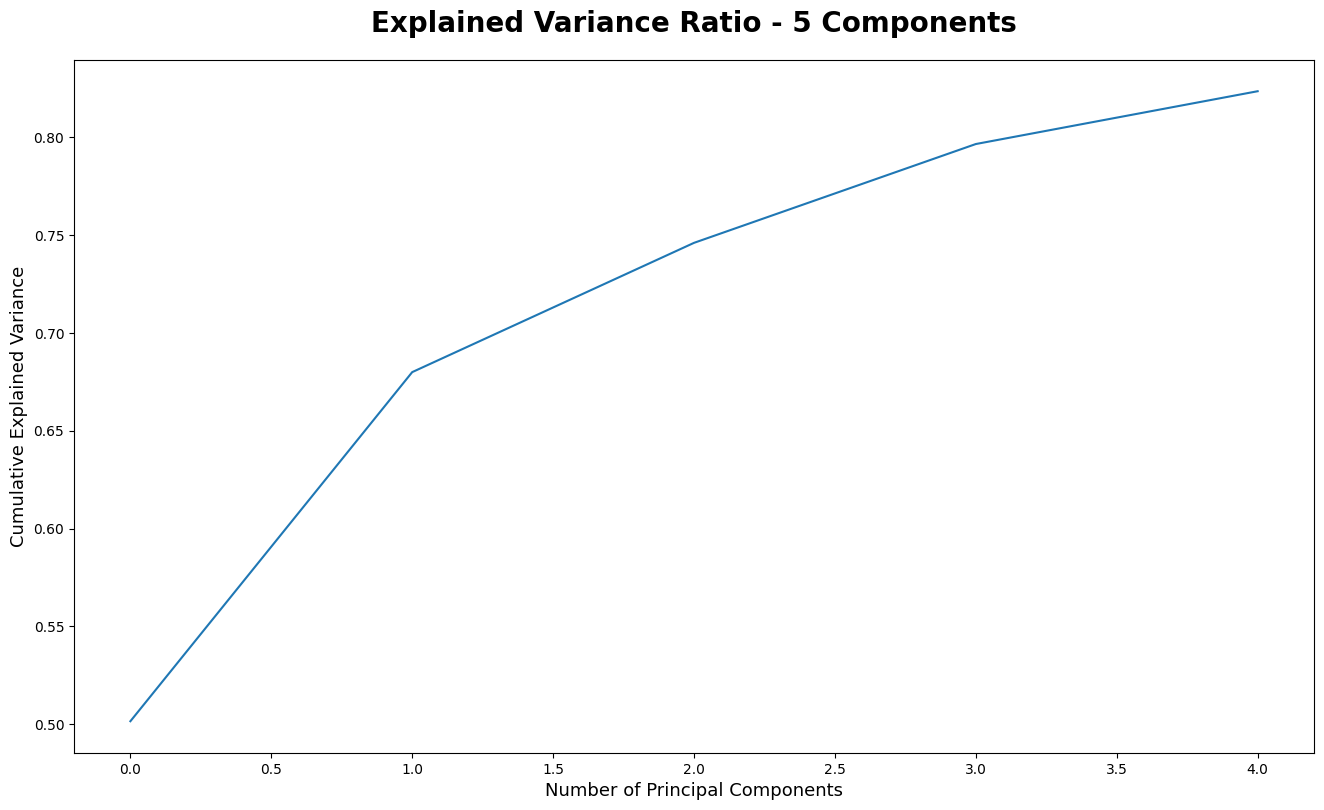

In [13]:
pca = PCA(n_components=5)
pca.fit(X)
pca_result = pca.transform(X)

plt.subplots(figsize = (16, 9))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components', fontsize=13)
plt.ylabel('Cumulative Explained Variance', fontsize=13)
plt.title('Explained Variance Ratio - 5 Components', fontsize=20, pad=20, fontweight='bold')
plt.show()

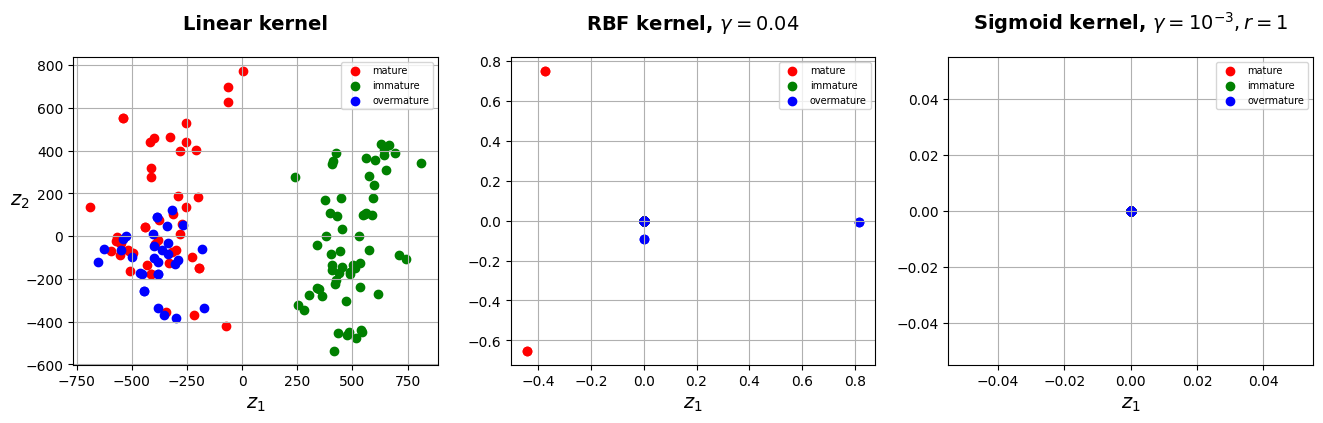

In [15]:
lin_pca = KernelPCA(n_components=5, kernel="linear")
rbf_pca = KernelPCA(n_components=5, kernel="rbf", gamma=0.0433)
sig_pca = KernelPCA(n_components=5, kernel="sigmoid", gamma=0.001)

unique_labels = set(labels)
label_colors = {'mature': 'red', 'immature': 'green', 'overmature': 'blue'}

plt.figure(figsize=(16, 4))
for subplot, pca, title in((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    reduced = pca.fit_transform(X)

    x = reduced[:, 0]
    y = reduced[:, 1]

    plt.subplot(subplot)
    for label in unique_labels:
        indices = np.where(np.array(labels) == label)
        plt.scatter(x[indices], y[indices], c=label_colors[label], label=label)

    plt.title(title, fontsize=14, fontweight='bold', pad=20)
    plt.xlabel("$z_1$", fontsize=14)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=14, rotation=0)
    plt.legend(fontsize=7)
    plt.grid()
plt.show()

In [38]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
labels = df_cut['class_name'].values
label_encoder = LabelEncoder()

# Fit and transform the labels
encoded_labels = label_encoder.fit_transform(labels)

In [46]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
labels = df_cut['class_name'].values
one_hot_encoder = OneHotEncoder()

# Fit and transform the labels
encoded_labels = one_hot_encoder.fit_transform(labels.reshape(-1, 1)).toarray()


In [47]:
encoded_labels

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [48]:
encoded_labels.shape

(139, 3)

In [49]:
reshaped_features = np.reshape(X, (139, 1, 2286))
print(reshaped_features.shape)

(139, 1, 2286)


In [40]:
from sklearn.model_selection import train_test_split

# Assuming you have your combined_data and combined_labels from the previous step

# Split the data and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, encoded_labels, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print(X_train.shape)  # Shape of the training data
print(y_train.shape)  # Shape of the training labels
print(X_test.shape)   # Shape of the testing data
print(y_test.shape)   # Shape of the testing labels

(111, 2286)
(111,)
(28, 2286)
(28,)


In [50]:
from sklearn.model_selection import train_test_split

# Assuming you have your combined_data and combined_labels from the previous step

# Split the data and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reshaped_features, encoded_labels, test_size=0.2, random_state=42)
# Print the shapes of the training and testing sets
print(X_train.shape)  # Shape of the training data
print(y_train.shape)  # Shape of the training labels
print(X_test.shape)   # Shape of the testing data
print(y_test.shape)   # Shape of the testing labels

(111, 1, 2286)
(111, 3)
(28, 1, 2286)
(28, 3)


In [54]:
# Assuming you have X_train and y_train from the previous step

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(1, 2286)))  # Adjust the units, timesteps, and features according to your data
model.add(Dense(units=3, activation='softmax'))  # Adjust the units and activation based on your classification task

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1000)  # Adjust the number of epochs and batch size based on your data

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/1000
4/4 [==============================] - 3s 11ms/step - loss: 0.9802 - accuracy: 0.5405
Epoch 2/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.7743 - accuracy: 0.6847
Epoch 3/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.6949 - accuracy: 0.7207
Epoch 4/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.6927 - accuracy: 0.7297
Epoch 5/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.6442 - accuracy: 0.8018
Epoch 6/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.6143 - accuracy: 0.8018
Epoch 7/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.6036 - accuracy: 0.8018
Epoch 8/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.6022 - accuracy: 0.8018
Epoch 9/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5912 - accuracy: 0.8018
Epoch 10/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.5792 - accuracy: 0.8018
Epoch 11/

In [65]:
model.save('./model/model1.h5')

In [66]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('./model/model1.h5')
predictions = model.predict(X_test)


1/1 [==============================] - 0s 361ms/step


In [67]:
y_pred_labels = np.argmax(predictions, axis=1)

In [68]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_labels)
print(report)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [29]:
pncc_feature = np.stack(df_cut['PNCC-feature'].values)
mfcc_feature = np.stack(df_cut['MFCC-feature'].values)
ae_feature = np.stack(df_cut['amplitude-envelope'].values)
zcr_feature = np.stack(df_cut['zero-crossing-rate'].values)
rmse_feature = np.stack(df_cut['RMS-energy'].values)

labels = df_cut['class_name'].values
X = np.concatenate((pncc_feature.reshape(139, -1),
                    mfcc_feature.reshape(139, -1),
                    ae_feature.reshape(139, -1),
                    zcr_feature.reshape(139, -1),
                    rmse_feature.reshape(139, -1)), axis=1)

X.shape

(139, 2286)

In [28]:
pncc_feature = np.stack(df_cut['PNCC-feature'].values)
mfcc_feature = np.stack(df_cut['MFCC-feature'].values)
ae_feature = np.stack(df_cut['amplitude-envelope'].values)
zcr_feature = np.stack(df_cut['zero-crossing-rate'].values)
rmse_feature = np.stack(df_cut['RMS-energy'].values)

print(pncc_feature.shape)
print(mfcc_feature.shape)
print(ae_feature.shape)
print(zcr_feature.shape)
print(rmse_feature.shape)

(139, 98, 13)
(139, 20, 44)
(139, 44)
(139, 44)
(139, 44)


In [25]:
13+20+44+44+44

165

In [27]:
features = np.concatenate([pncc_feature, mfcc_feature, ae_feature, zcr_feature, rmse_feature], axis=0)
features.shape

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 98 and the array at index 1 has size 20

In [18]:
from sklearn.model_selection import train_test_split

# Assuming you have your combined_data and combined_labels from the previous step

# Split the data and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print(X_train.shape)  # Shape of the training data
print(y_train.shape)  # Shape of the training labels
print(X_test.shape)   # Shape of the testing data
print(y_test.shape)   # Shape of the testing labels


(111, 2286)
(111,)
(28, 2286)
(28,)


In [19]:
# Assuming you have X_train and y_train from the previous step

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(1, 2286)))  # Adjust the units, timesteps, and features according to your data
model.add(Dense(units=3, activation='softmax'))  # Adjust the units and activation based on your classification task

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)  # Adjust the number of epochs and batch size based on your data

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


Epoch 1/100


ValueError: in user code:

    File "d:\Cool Yeah\Semester 118\coconut-maturity-classification\envSkripsi\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "d:\Cool Yeah\Semester 118\coconut-maturity-classification\envSkripsi\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\Cool Yeah\Semester 118\coconut-maturity-classification\envSkripsi\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "d:\Cool Yeah\Semester 118\coconut-maturity-classification\envSkripsi\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "d:\Cool Yeah\Semester 118\coconut-maturity-classification\envSkripsi\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "d:\Cool Yeah\Semester 118\coconut-maturity-classification\envSkripsi\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 1, 2286), found shape=(None, 2286)


In [56]:
df_data

NameError: name 'df_data' is not defined

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have the data and labels in separate lists or arrays
data = [data_point1, data_point2, ..., data_point180]
labels = [label1, label2, ..., label180]

# Create a DataFrame with the data and labels
df = pd.DataFrame({'data': data, 'labels': labels})

# Shuffle the DataFrame to ensure randomness
df = df.sample(frac=1).reset_index(drop=True)

# Split the data and labels into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Access the training data and labels
train_data = train_df['data']
train_labels = train_df['labels']

# Access the testing data and labels
test_data = test_df['data']
test_labels = test_df['labels']


C:\Users\hi\AppData\Local\Temp\ipykernel_8048\3893043968.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x[indices], y[indices], c=label_colors[label], cmap='viridis')


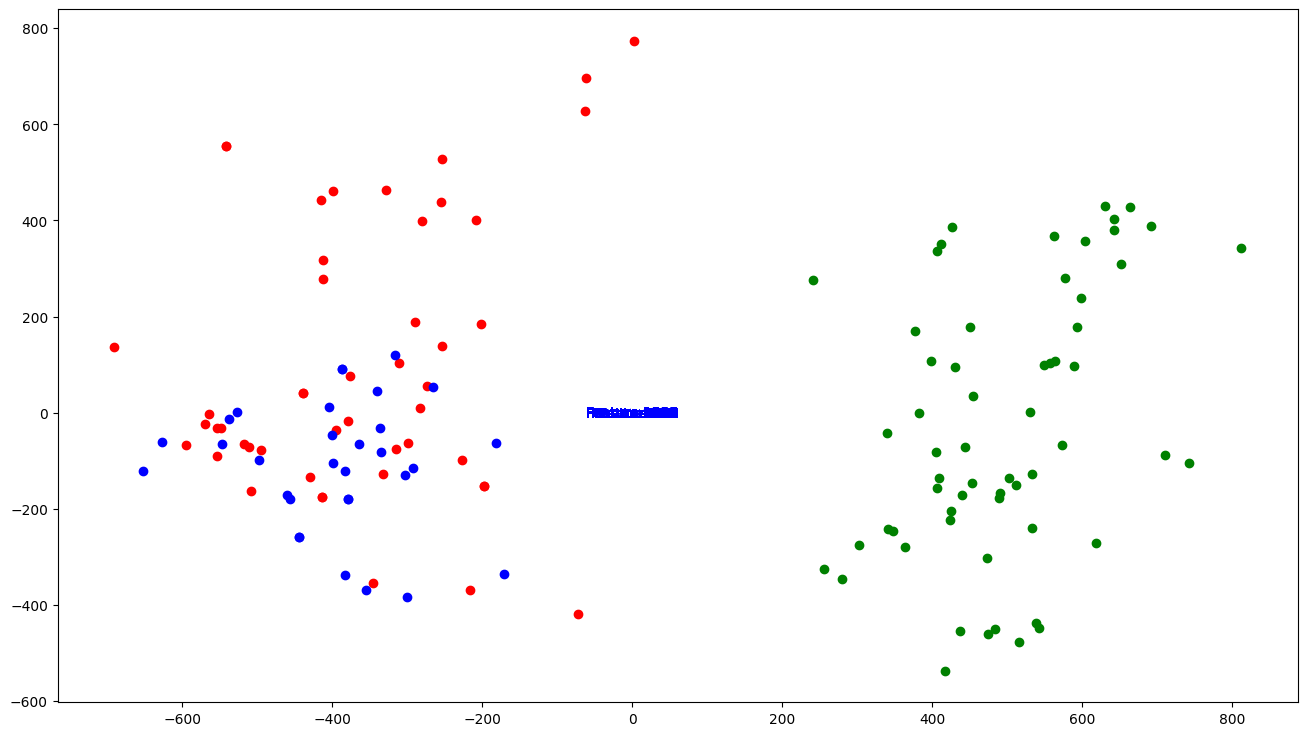

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=5)
pca.fit(X)
pca_result = pca.transform(X)

labels = df_cut['class_name'].values.tolist()

# Create a dictionary to map labels to colors for plotting
label_colors = {'mature': 'red', 'immature': 'green', 'overmature': 'blue'}

x = pca_result[:, 0]
y = pca_result[:, 1]

unique_labels = set(labels)

fig, ax = plt.subplots(figsize=(16, 9))
for label in unique_labels:
    indices = np.where(np.array(labels) == label)
    ax.scatter(x[indices], y[indices], c=label_colors[label], cmap='viridis')

# plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
feature_vectors = pca.components_.T
arrow_scale = 0.2
for i, feature in enumerate(feature_vectors):
    plt.arrow(0, 0, arrow_scale * feature[0], arrow_scale * feature[1], color='r', alpha=0.5)
    plt.text(feature[0] * 1.15, feature[1] * 1.15, f'Feature {i+1}', color='b', ha='center', va='center')

In [176]:
df['amplitude-envelope'].values[0].shape

(44,)

In [201]:
np.stack(df_cut['PNCC-feature'].values).shape

(139, 98, 13)

In [203]:
np.stack(df_cut['PNCC-feature'].values).reshape((139, -1)).shape

(139, 1274)

In [186]:
df['PNCC-feature'].values[0].flatten()

array([ 2.00009825, -0.32312278,  0.01555734, ..., -0.02381299,
       -0.00239147, -0.0128392 ])

In [189]:
df['PNCC-feature'].values[0].ravel()

array([ 2.00009825, -0.32312278,  0.01555734, ..., -0.02381299,
       -0.00239147, -0.0128392 ])

In [187]:
df['PNCC-feature'].values[0].flatten().shape

(1274,)

In [ ]:
zero_crossing_rate = librosa.feature.zero_crossing_rate(immature)
rms_energy = librosa.feature.rms(y=immature)

In [213]:
print(feature1.shape)
print(feature2.shape)
print(feature3.shape)
print(feature4.shape)
print(feature5.shape)

(60, 98, 13)
(60, 20, 44)
(60, 44)
(60, 44)
(60, 44)


In [211]:
X.shape

(60, 2286)

In [208]:
labels.shape

(180,)

In [112]:
from spafe.features.pncc import pncc
pnccs = []
vector_size = []

for filename in df['full_path'].values:
    wavSig, sampRate = librosa.load(filename)
    result = pncc(wavSig, fs=sampRate)
    pnccs.append(result)
    vector_size.append(result.shape)

d:\Cool Yeah\Semester 118\coconut-maturity-classification\envSkripsi\lib\site-packages\spafe\features\pncc.py:169: RuntimeWarning: invalid value encountered in scalar divide
  [R_tilde[m, lprime] / Q_tilde[m, lprime] for lprime in range(l1, l2)]
d:\Cool Yeah\Semester 118\coconut-maturity-classification\envSkripsi\lib\site-packages\spafe\features\pncc.py:169: RuntimeWarning: divide by zero encountered in scalar divide
  [R_tilde[m, lprime] / Q_tilde[m, lprime] for lprime in range(l1, l2)]
d:\Cool Yeah\Semester 118\coconut-maturity-classification\envSkripsi\lib\site-packages\spafe\features\pncc.py:437: RuntimeWarning: invalid value encountered in multiply
  T = P * S_tilde


In [113]:
df['PNCC-feature'] = pnccs
df['PNCC-feature-size'] = vector_size

df

,full_path,file_name,class_name,PNCC-feature,PNCC-feature-size
0,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10a.wav,mature,"[[2.000098246886966, -0.32312278051968846, 0.0...","(98, 13)"
1,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10b.wav,mature,"[[2.03020507353705, -0.3081231693218536, 0.023...","(98, 13)"
2,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10c.wav,mature,"[[2.053201586789632, -0.30926271900245395, 0.0...","(98, 13)"
3,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11a.wav,mature,"[[2.1524977561943794, -0.2745882742675701, -0....","(98, 13)"
4,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11b.wav,mature,"[[2.085433271523342, -0.3482630528427392, -0.0...","(98, 13)"
...,...,...,...,...,...
175,./Sample-kelapa/data/cut_sample/tua/wav/tua8b.wav,tua8b.wav,overmature,"[[2.0537136283217605, -0.3141183737907519, 0.0...","(98, 13)"
176,./Sample-kelapa/data/cut_sample/tua/wav/tua8c.wav,tua8c.wav,overmature,"[[1.9822215851057952, -0.3148358106033424, 0.0...","(98, 13)"
177,./Sample-kelapa/data/cut_sample/tua/wav/tua9a.wav,tua9a.wav,overmature,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","(98, 13)"
178,./Sample-kelapa/data/cut_sample/tua/wav/tua9b.wav,tua9b.wav,overmature,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","(98, 13)"


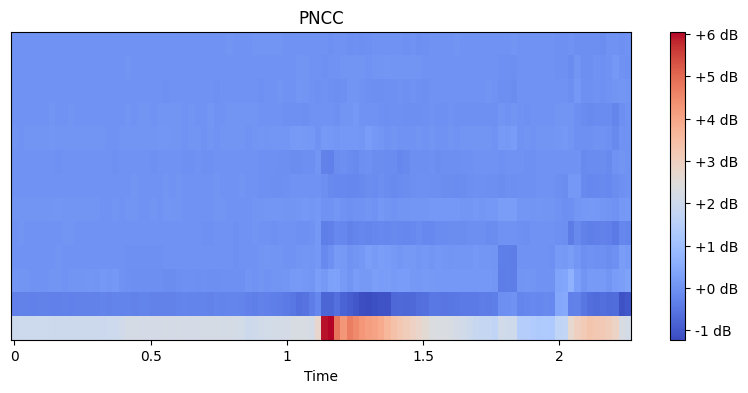

In [75]:
from spafe.features.pncc import pncc
wavSig, sampRate = librosa.load(df['full_path'].values[-4])
pncc_result = pncc(wavSig, fs=sampRate)

plt.figure(figsize=(10, 4))
librosa.display.specshow(np.transpose(pncc_result), x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('PNCC')
plt.show()

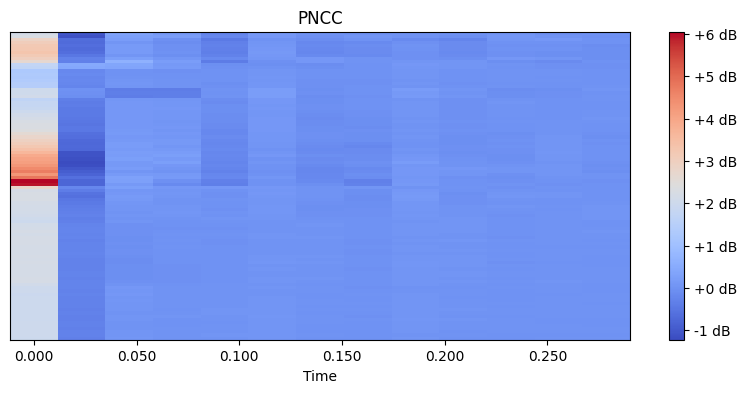

In [76]:
from spafe.features.pncc import pncc
wavSig, sampRate = librosa.load(df['full_path'].values[-4])
pncc_result = pncc(wavSig, fs=sampRate)

plt.figure(figsize=(10, 4))
librosa.display.specshow(pncc_result, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('PNCC')
plt.show()

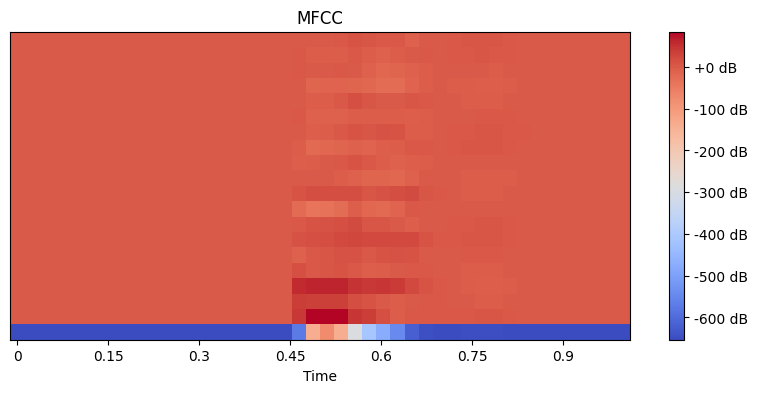

In [64]:
wavSig, sampRate = librosa.load(filename)
mfcc_result = librosa.feature.mfcc(y=wavSig, sr=sampRate)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_result, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.show()

In [71]:
print(pncc_result.shape)
print(np.transpose(pncc_result).shape)
print(mfcc_result.shape)

(98, 13)
(13, 98)
(20, 44)


In [72]:
print(pncc_result)
print(mfcc_result)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[-6.53338867e+02 -6.53338867e+02 -6.53338867e+02 -6.53338867e+02
  -6.53338867e+02 -6.53338867e+02 -6.53338867e+02 -6.53338867e+02
  -6.53338867e+02 -6.53338867e+02 -6.53338867e+02 -6.53338867e+02
  -6.53338867e+02 -6.53338867e+02 -6.53338867e+02 -6.53338867e+02
  -6.53338867e+02 -6.53338867e+02 -6.53338867e+02 -6.53338867e+02
  -5.75296814e+02 -1.39340424e+02 -7.69120712e+01 -1.38178391e+02
  -2.92495178e+02 -4.12517395e+02 -4.74859131e+02 -5.44463989e+02
  -6.20918457e+02 -6.47083679e+02 -6.51218933e+02 -6.51190857e+02
  -6.49646851e+02 -6.48010986e+02 -6.48699158e+02 -6.51440918e+02
  -6.52571777e+02 -6.52912476e+02 -6.52827942e+02 -6.53030273e+02
  -6.52990601e+02 -6.53169189e+02 -6.53167786e+02 -6.53338867e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+

In [114]:
df

,full_path,file_name,class_name,PNCC-feature,PNCC-feature-size
0,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10a.wav,mature,"[[2.000098246886966, -0.32312278051968846, 0.0...","(98, 13)"
1,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10b.wav,mature,"[[2.03020507353705, -0.3081231693218536, 0.023...","(98, 13)"
2,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10c.wav,mature,"[[2.053201586789632, -0.30926271900245395, 0.0...","(98, 13)"
3,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11a.wav,mature,"[[2.1524977561943794, -0.2745882742675701, -0....","(98, 13)"
4,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11b.wav,mature,"[[2.085433271523342, -0.3482630528427392, -0.0...","(98, 13)"
...,...,...,...,...,...
175,./Sample-kelapa/data/cut_sample/tua/wav/tua8b.wav,tua8b.wav,overmature,"[[2.0537136283217605, -0.3141183737907519, 0.0...","(98, 13)"
176,./Sample-kelapa/data/cut_sample/tua/wav/tua8c.wav,tua8c.wav,overmature,"[[1.9822215851057952, -0.3148358106033424, 0.0...","(98, 13)"
177,./Sample-kelapa/data/cut_sample/tua/wav/tua9a.wav,tua9a.wav,overmature,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","(98, 13)"
178,./Sample-kelapa/data/cut_sample/tua/wav/tua9b.wav,tua9b.wav,overmature,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","(98, 13)"


In [95]:
sigShape = []
srList = []
durations = []

for filename in df['full_path'].values:
    wavSig, sampRate = librosa.load(filename)
    sigShape.append(wavSig.shape)
    srList.append(sampRate)
    duration = 1 / sampRate * len(wavSig)
    durations.append(duration)

In [96]:
df['signal-shape'] = sigShape
df['sample-rate'] = srList
df['duration'] = durations

df

,full_path,file_name,class_name,PNCC-feature,PNCC-feature-size,signal-shape,sample-rate,duration
0,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10a.wav,mature,"[[2.000098246886966, -0.32312278051968846, 0.0...","(98, 13)","(22050,)",22050,1.0
1,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10b.wav,mature,"[[2.03020507353705, -0.3081231693218536, 0.023...","(98, 13)","(22050,)",22050,1.0
2,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10c.wav,mature,"[[2.053201586789632, -0.30926271900245395, 0.0...","(98, 13)","(22050,)",22050,1.0
3,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11a.wav,mature,"[[2.1524977561943794, -0.2745882742675701, -0....","(98, 13)","(22050,)",22050,1.0
4,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11b.wav,mature,"[[2.085433271523342, -0.3482630528427392, -0.0...","(98, 13)","(22050,)",22050,1.0
...,...,...,...,...,...,...,...,...
175,./Sample-kelapa/data/cut_sample/tua/wav/tua8b.wav,tua8b.wav,overmature,"[[2.0537136283217605, -0.3141183737907519, 0.0...","(98, 13)","(22050,)",22050,1.0
176,./Sample-kelapa/data/cut_sample/tua/wav/tua8c.wav,tua8c.wav,overmature,"[[1.9822215851057952, -0.3148358106033424, 0.0...","(98, 13)","(22050,)",22050,1.0
177,./Sample-kelapa/data/cut_sample/tua/wav/tua9a.wav,tua9a.wav,overmature,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","(98, 13)","(22050,)",22050,1.0
178,./Sample-kelapa/data/cut_sample/tua/wav/tua9b.wav,tua9b.wav,overmature,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","(98, 13)","(22050,)",22050,1.0


In [133]:
immature_file = './Sample-kelapa/data/cut_sample/muda/wav/muda11b.wav'
mature_file = './Sample-kelapa/data/cut_sample/matang/wav/mtg16b.wav'
overmature_file = './Sample-kelapa/data/cut_sample/tua/wav/tua5c.wav'

In [123]:
ipd.Audio(immature_file)

In [134]:
immature, sr = librosa.load(immature_file)
immature.shape

(22058,)

In [135]:
mature, _ = librosa.load(mature_file)
overmature, _ = librosa.load(overmature_file)

In [125]:
# duration in seconds of 1 sample
sample_duration = 1 / sr
print(f"One sample lasts for {sample_duration:6f} seconds")

One sample lasts for 0.000045 seconds


In [126]:
# total number of samples in audio file
tot_samples = len(immature)
tot_samples

22058

In [127]:
# duration of debussy audio in seconds
duration = 1 / sr * tot_samples
print(f"The audio lasts for {duration} seconds")

The audio lasts for 1.0003628117913832 seconds


In [136]:
FRAME_SIZE = 2048
HOP_LENGTH = 512

def amplitude_envelope(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size nad hop length."""
    amplitude_envelope = []
    
    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length): 
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) 
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope)    

In [137]:
ae_immature = amplitude_envelope(immature, FRAME_SIZE, HOP_LENGTH)
len(ae_immature)

44

In [138]:
ae_mature = amplitude_envelope(mature, FRAME_SIZE, HOP_LENGTH)
len(ae_mature)

44

In [139]:
ae_overmature = amplitude_envelope(overmature, FRAME_SIZE, HOP_LENGTH)
len(ae_overmature)

44

In [131]:
frames = range(len(ae_immature))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

In [157]:
ae_immature = amplitude_envelope(immature, FRAME_SIZE, HOP_LENGTH)
ae_mature = amplitude_envelope(mature, FRAME_SIZE, HOP_LENGTH)
ae_overmature = amplitude_envelope(overmature, FRAME_SIZE, HOP_LENGTH)

zcr_immature = librosa.feature.zero_crossing_rate(immature)
zcr_mature = librosa.feature.zero_crossing_rate(mature)
zcr_overmature = librosa.feature.zero_crossing_rate(overmature)

Text(0.5, 1.0, 'Overmature')

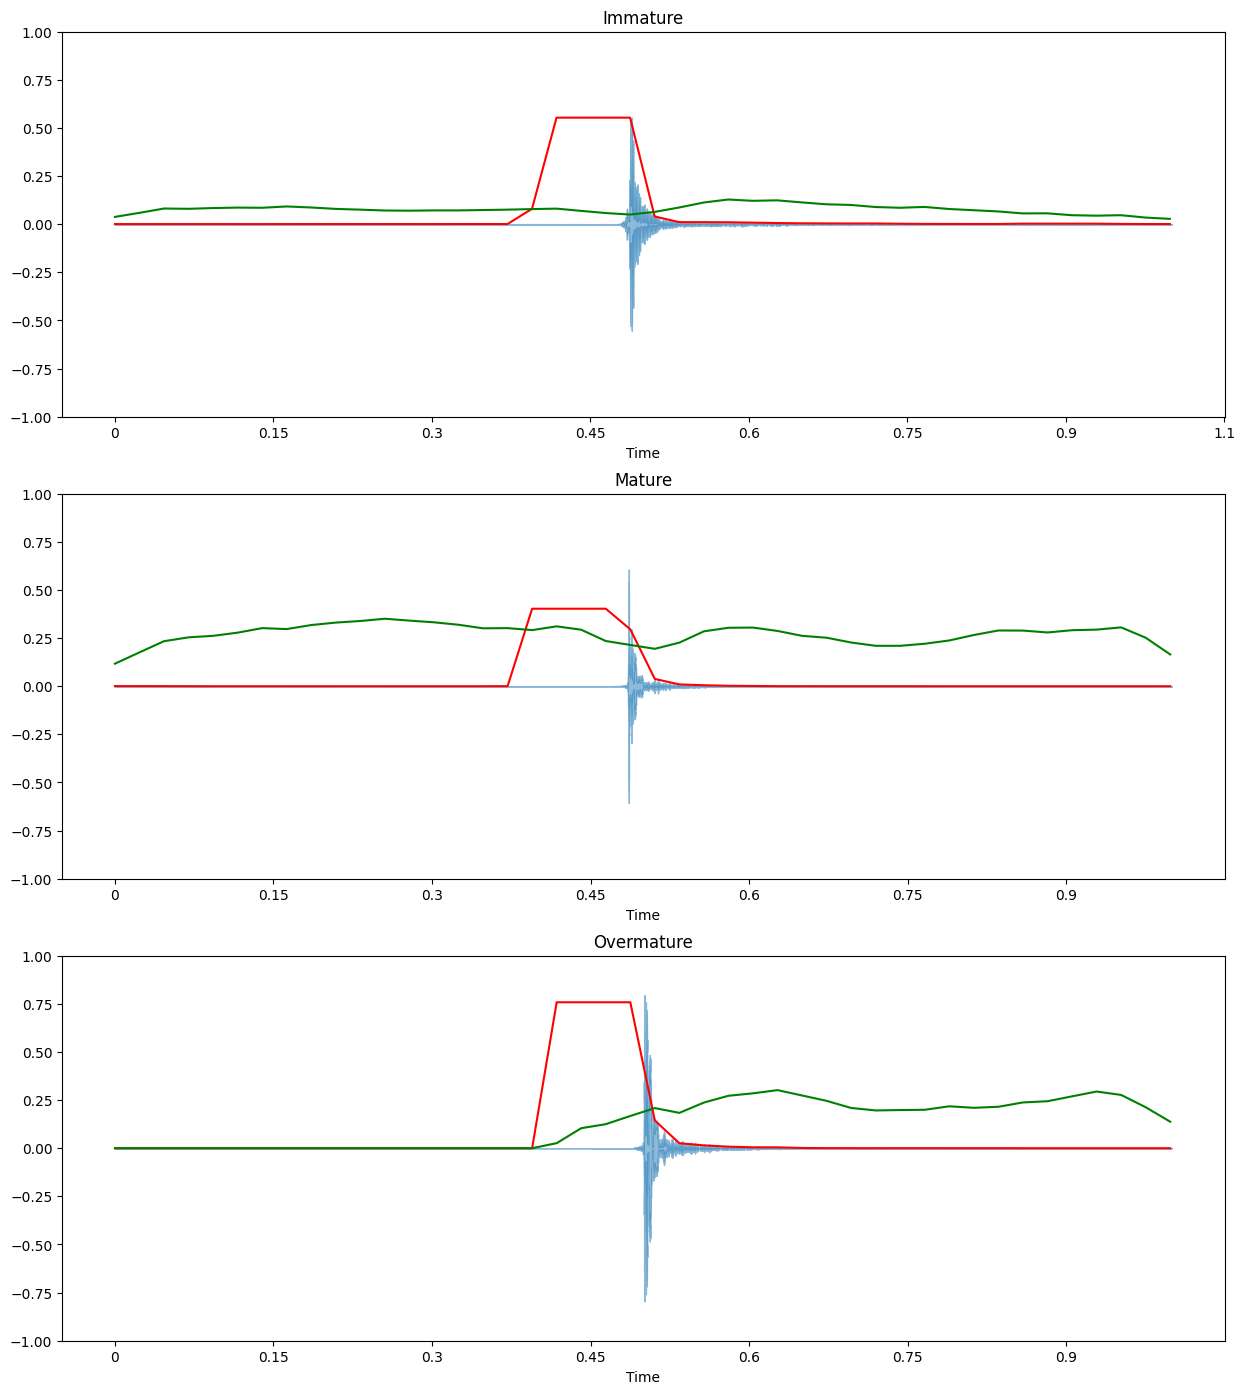

In [159]:
plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(immature, alpha=0.5)
plt.plot(t, ae_immature, color="r")
plt.plot(t, zcr_immature, color='g')
plt.ylim((-1, 1))
plt.title("Immature")

plt.subplot(3, 1, 2)
librosa.display.waveshow(mature, alpha=0.5)
plt.plot(t, ae_mature, color="r")
plt.plot(t, zcr_mature, color='g')
plt.ylim((-1, 1))
plt.title("Mature")

plt.subplot(3, 1, 3)
librosa.display.waveshow(overmature, alpha=0.5)
plt.plot(t, ae_overmature, color="r")
plt.plot(t, zcr_overmature, color='g')
plt.ylim((-1, 1))
plt.title("Overmature")

In [ ]:
from spafe.features.pncc import pncc
pnccs = []
vector_size = []

for filename in df['full_path'].values:
    wavSig, sampRate = librosa.load(filename)
    result = pncc(wavSig, fs=sampRate)
    pnccs.append(result)
    vector_size.append(result.shape)

In [77]:
def createWaveplot(data, sampleRate, maturity):
    plt.figure(figsize=(8,2))
    plt.title(f'Waveplot for {maturity} maturity', size = 15, pad = 20)
    librosa.display.waveshow(data, sr=sampleRate, alpha=0.5)
    plt.show()

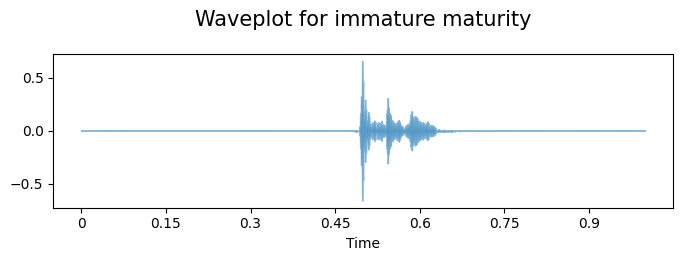

In [79]:
audio_immature, sr_immature = librosa.load('./Sample-kelapa/cut sample/Sample-kelapa-muda/wav/muda4_c.wav')
createWaveplot(audio_immature, sr_immature, "immature")
ipd.Audio('./Sample-kelapa/cut sample/Sample-kelapa-muda/wav/muda4_c.wav')

In [147]:
zero_crossing_rate = librosa.feature.zero_crossing_rate(immature)
rms_energy = librosa.feature.rms(y=immature)

In [148]:
print(zero_crossing_rate)
print(rms_energy)

[[0.03808594 0.05908203 0.08154297 0.08007812 0.08398438 0.08642578
  0.08544922 0.09228516 0.08691406 0.07958984 0.07568359 0.07128906
  0.0703125  0.07177734 0.07177734 0.07373047 0.07568359 0.07861328
  0.08105469 0.06933594 0.05810547 0.05029297 0.06396484 0.08691406
  0.11279297 0.12841797 0.12158203 0.12402344 0.11328125 0.10351562
  0.10009766 0.08935547 0.08544922 0.08984375 0.07910156 0.07275391
  0.06640625 0.05615234 0.05664062 0.046875   0.04443359 0.046875
  0.03466797 0.02783203]]
[[0.00019811 0.00023344 0.0002586  0.00026525 0.00026037 0.00024485
  0.00024057 0.00022622 0.00021647 0.00025169 0.00027446 0.00029505
  0.00029371 0.00026602 0.00027529 0.00027379 0.00030787 0.00033618
  0.00031977 0.02247876 0.08156177 0.08188904 0.08192171 0.07880455
  0.00817425 0.0039502  0.00343325 0.0028738  0.00230342 0.00189922
  0.00158517 0.00145656 0.0012035  0.00095777 0.00072078 0.00053327
  0.00051149 0.00048408 0.00047883 0.00067252 0.00067354 0.00064938
  0.00060952 0.00030821]

In [ ]:
mfccs = []
mfcc_vectors = []

for filename in df['full_path'].values:
    wavSig, sampRate = librosa.load(filename)
    result = librosa.feature.mfcc(wavSig, fs=sampRate)
    mfccs.append(result)
    mfcc_vectors.append(result.shape)